In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from datetime import datetime
import pickle
from comparers import ModelComparer
import matplotlib.pyplot as plt
from IPython.display import display
from util import RuleClassifier, find_counterfactuals, counterfactuals_to_constraint_matrix,\
                 evaluate_counterfactual_fidelity, get_complexity
from surrogate_tree import train_surrogate_tree, tree_to_rules, plot_surrogate_tree,\
                 get_feature_importances, plot_feature_importances, plot_tree_leafs_for_class,\
                 tree_to_constraint_matrix, constraint_matrix_to_rules, extract_rules, print_rules,\
                 evaluate, search_max_depth_parameter
from tasks.boston_housing import make_task4 as make_task

In [2]:
clf_a, clf_b, X, y, feature_names, categorical_features, feature_precisions = make_task()
comparer = ModelComparer(clf_a, clf_b, feature_names)

Trying to unpickle estimator LabelBinarizer from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator MLPClassifier from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.


### Find Optimal Solution

In [7]:
%%time
metrics = search_max_depth_parameter(X, mclass_diff, feature_names, comparer.difference_classes, start=2, stop=20)

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted s

CPU times: user 929 ms, sys: 31.4 ms, total: 961 ms
Wall time: 670 ms


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


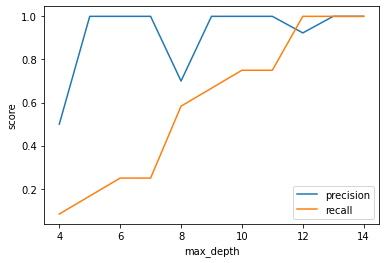

In [11]:
metrics.loc[:, ('precision', 'recall')].plot()
plt.xlabel('max_depth')
plt.ylabel('score')
plt.savefig('boston4-baseline-pr-curve.pdf')

# Explanations

In [3]:
mclass_diff = comparer.predict_mclass_diff(X)

In [4]:
ground_truth_per_class = {}
for label in comparer.difference_class_names:
    with open(f'ground_truth.{label}.pickle', 'rb') as f:
        ground_truth_per_class[label] = pickle.load(f)

Trees with depths below 7 are not complex enough to describe all instances of the difference classes.

In [5]:
%%time
model = train_surrogate_tree(X, mclass_diff, max_depth=2)
evaluate(model, X, mclass_diff, comparer.class_names)

              precision    recall  f1-score   support

      (0, 0)       0.96      0.83      0.89        86
      (0, 1)       0.00      0.00      0.00         3
      (1, 0)       0.00      0.00      0.00         2
      (1, 1)       0.60      0.96      0.74        52
      (1, 2)       0.00      0.00      0.00         5
      (2, 1)       0.00      0.00      0.00         2
      (2, 2)       0.96      0.89      0.92        96

    accuracy                           0.84       246
   macro avg       0.36      0.38      0.36       246
weighted avg       0.84      0.84      0.83       246

CPU times: user 13.2 ms, sys: 3.54 ms, total: 16.8 ms
Wall time: 19.9 ms


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [6]:
%%time
model = train_surrogate_tree(X, mclass_diff, max_depth=3)
evaluate(model, X, mclass_diff, comparer.class_names)

              precision    recall  f1-score   support

      (0, 0)       0.97      0.97      0.97        86
      (0, 1)       1.00      0.33      0.50         3
      (1, 0)       0.00      0.00      0.00         2
      (1, 1)       0.83      0.96      0.89        52
      (1, 2)       0.00      0.00      0.00         5
      (2, 1)       0.00      0.00      0.00         2
      (2, 2)       0.97      1.00      0.98        96

    accuracy                           0.93       246
   macro avg       0.54      0.47      0.48       246
weighted avg       0.90      0.93      0.92       246

CPU times: user 13 ms, sys: 3.27 ms, total: 16.3 ms
Wall time: 17.4 ms


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [7]:
%%time
model = train_surrogate_tree(X, mclass_diff, max_depth=4)
evaluate(model, X, mclass_diff, comparer.class_names)

              precision    recall  f1-score   support

      (0, 0)       0.98      0.99      0.98        86
      (0, 1)       1.00      0.33      0.50         3
      (1, 0)       0.00      0.00      0.00         2
      (1, 1)       0.93      0.98      0.95        52
      (1, 2)       1.00      0.80      0.89         5
      (2, 1)       1.00      1.00      1.00         2
      (2, 2)       0.99      1.00      0.99        96

    accuracy                           0.97       246
   macro avg       0.84      0.73      0.76       246
weighted avg       0.96      0.97      0.97       246

CPU times: user 10.6 ms, sys: 2.45 ms, total: 13.1 ms
Wall time: 16.3 ms


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [8]:
%%time
model = train_surrogate_tree(X, mclass_diff, max_depth=5)
evaluate(model, X, mclass_diff, comparer.class_names)

              precision    recall  f1-score   support

      (0, 0)       1.00      0.99      0.99        86
      (0, 1)       0.67      0.67      0.67         3
      (1, 0)       0.67      1.00      0.80         2
      (1, 1)       0.96      0.96      0.96        52
      (1, 2)       1.00      1.00      1.00         5
      (2, 1)       1.00      1.00      1.00         2
      (2, 2)       1.00      1.00      1.00        96

    accuracy                           0.98       246
   macro avg       0.90      0.95      0.92       246
weighted avg       0.99      0.98      0.98       246

CPU times: user 9.74 ms, sys: 2.01 ms, total: 11.8 ms
Wall time: 12.9 ms


In [9]:
%%time
model = train_surrogate_tree(X, mclass_diff, max_depth=6)
evaluate(model, X, mclass_diff, comparer.class_names)

              precision    recall  f1-score   support

      (0, 0)       0.98      1.00      0.99        86
      (0, 1)       1.00      0.67      0.80         3
      (1, 0)       1.00      1.00      1.00         2
      (1, 1)       1.00      0.98      0.99        52
      (1, 2)       1.00      1.00      1.00         5
      (2, 1)       1.00      1.00      1.00         2
      (2, 2)       1.00      1.00      1.00        96

    accuracy                           0.99       246
   macro avg       1.00      0.95      0.97       246
weighted avg       0.99      0.99      0.99       246

CPU times: user 11.3 ms, sys: 2.62 ms, total: 14 ms
Wall time: 16.1 ms


## Tree with Depth 7

In [12]:
%%time
model = train_surrogate_tree(X, mclass_diff, max_depth=7)
evaluate(model, X, mclass_diff, comparer.class_names)

              precision    recall  f1-score   support

      (0, 0)       0.99      1.00      0.99        86
      (0, 1)       1.00      1.00      1.00         3
      (1, 0)       1.00      1.00      1.00         2
      (1, 1)       1.00      0.98      0.99        52
      (1, 2)       1.00      1.00      1.00         5
      (2, 1)       1.00      1.00      1.00         2
      (2, 2)       1.00      1.00      1.00        96

    accuracy                           1.00       246
   macro avg       1.00      1.00      1.00       246
weighted avg       1.00      1.00      1.00       246

CPU times: user 12.1 ms, sys: 2.81 ms, total: 14.9 ms
Wall time: 16.9 ms


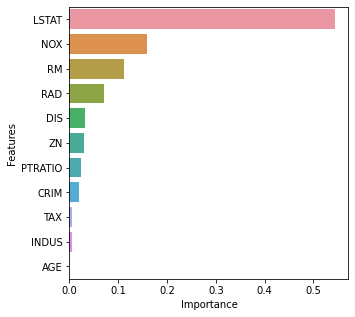

In [13]:
feature_importances, feature_order = get_feature_importances(model)
plot_feature_importances(feature_names, feature_importances, feature_order, figsize=(5, 5))

In [14]:
constraints, rules, class_occurences, labels, instance_indices_per_rule =\
    extract_rules(model, feature_names, comparer.difference_classes, X, mclass_diff)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. ZN > 57.5 and RM <= 6.5975000858306885 and RAD <= 15.0 and LSTAT <= 9.619999885559082 => (1, 2) [0, 0, 0, 0, 3, 0, 0]
2. CRIM <= 0.8610349893569946 and NOX <= 0.5909999907016754 and DIS > 2.271081805229187 and 16.423087120056152 < LSTAT <= 16.715493202209473 => (1, 0) [0, 0, 2, 0, 0, 0, 0]
3. NOX > 0.5909999907016754 and RM > 6.165999889373779 and 11.37000036239624 < LSTAT <= 14.789999961853027 => (0, 1) [0, 1, 0, 0, 0, 0, 0]
4. NOX > 0.5909999907016754 and 9.619999885559082 < LSTAT <= 11.37000036239624 => (0, 1) [0, 1, 0, 0, 0, 0, 0]
5. INDUS <= 13.90500020980835 and NOX <= 0.5909999907016754 and DIS > 2.271081805229187 and PTRATIO <= 16.5 and 9.619999885559082 < LSTAT <= 16.423087120056152 => (0, 1) [0, 1, 0, 0, 0, 0, 0]
6. RM > 6.5975000858306885 and TAX <= 274.0 and 9.21500015258789 < LSTAT <= 9.619999885559082 => (1, 2) [0, 0, 0, 0, 1, 0, 0]
7. RM > 6.5975000858306885 and PTRATIO > 20.600000381469727 and LSTAT <= 9.21500015258789 => (2, 1) [0, 0, 0, 0, 0, 1, 0]
8. CRIM <= 0.011

## Evaluation

### Global Fidelity

In [15]:
evaluate(model, X, mclass_diff, comparer.class_names)

              precision    recall  f1-score   support

      (0, 0)       0.99      1.00      0.99        86
      (0, 1)       1.00      1.00      1.00         3
      (1, 0)       1.00      1.00      1.00         2
      (1, 1)       1.00      0.98      0.99        52
      (1, 2)       1.00      1.00      1.00         5
      (2, 1)       1.00      1.00      1.00         2
      (2, 2)       1.00      1.00      1.00        96

    accuracy                           1.00       246
   macro avg       1.00      1.00      1.00       246
weighted avg       1.00      1.00      1.00       246



### Counterfactual Fidelity Error

#### (0, 1)

In [16]:
focus_class_idx, focus_class = comparer.check_class('(0, 1)')
ground_truth_instance_indices, ground_truth = ground_truth_per_class[focus_class]
constraints_focus, rules_focus, class_occurences_focus, instance_indices_per_rule_focus =\
    zip(*[(constraint, rule, class_occurences, instance_indices)
     for constraint, rule, class_occurences, label, instance_indices
     in zip(constraints, rules, class_occurences, labels, instance_indices_per_rule)
     if label == focus_class_idx])

In [17]:
errors, rmse, boundary_miss_rate, boundary_add_rate = \
    evaluate_counterfactual_fidelity(comparer, ground_truth_instance_indices, ground_truth, instance_indices_per_rule_focus, constraints_focus)

invalid value encountered in true_divide
invalid value encountered in true_divide


In [18]:
rmse

CRIM            NaN
ZN              NaN
INDUS      8.195000
NOX             NaN
RM         0.386000
AGE             NaN
DIS             NaN
RAD             NaN
TAX             NaN
PTRATIO    0.530000
LSTAT      1.910487
dtype: float64

In [19]:
boundary_miss_rate

CRIM       1.000000
ZN         1.000000
INDUS      0.833333
NOX             NaN
RM         0.833333
AGE        1.000000
DIS        1.000000
RAD        1.000000
TAX        1.000000
PTRATIO    0.833333
LSTAT      0.000000
dtype: float64

In [20]:
boundary_add_rate

CRIM       NaN
ZN         NaN
INDUS      0.0
NOX        1.0
RM         0.0
AGE        NaN
DIS        1.0
RAD        NaN
TAX        NaN
PTRATIO    0.0
LSTAT      0.0
dtype: float64

#### (1, 0)

In [21]:
focus_class_idx, focus_class = comparer.check_class('(1, 0)')
ground_truth_instance_indices, ground_truth = ground_truth_per_class[focus_class]
constraints_focus, rules_focus, class_occurences_focus, instance_indices_per_rule_focus =\
    zip(*[(constraint, rule, class_occurences, instance_indices)
     for constraint, rule, class_occurences, label, instance_indices
     in zip(constraints, rules, class_occurences, labels, instance_indices_per_rule)
     if label == focus_class_idx])

In [22]:
errors, rmse, boundary_miss_rate, boundary_add_rate = \
    evaluate_counterfactual_fidelity(comparer, ground_truth_instance_indices, ground_truth, instance_indices_per_rule_focus, constraints_focus)

In [23]:
rmse

CRIM       0.138965
ZN              NaN
INDUS           NaN
NOX        0.139000
RM              NaN
AGE             NaN
DIS        0.875900
RAD             NaN
TAX             NaN
PTRATIO         NaN
LSTAT      0.053146
dtype: float64

In [24]:
boundary_miss_rate

CRIM       0.5
ZN         1.0
INDUS      1.0
NOX        0.0
RM         1.0
AGE        1.0
DIS        0.0
RAD        1.0
TAX        1.0
PTRATIO    1.0
LSTAT      0.0
dtype: float64

In [25]:
boundary_add_rate

CRIM       0.0
ZN         NaN
INDUS      NaN
NOX        0.5
RM         NaN
AGE        NaN
DIS        0.0
RAD        NaN
TAX        NaN
PTRATIO    NaN
LSTAT      0.0
dtype: float64

#### (1, 2)

In [26]:
focus_class_idx, focus_class = comparer.check_class('(1, 2)')
ground_truth_instance_indices, ground_truth = ground_truth_per_class[focus_class]
constraints_focus, rules_focus, class_occurences_focus, instance_indices_per_rule_focus =\
    zip(*[(constraint, rule, class_occurences, instance_indices)
     for constraint, rule, class_occurences, label, instance_indices
     in zip(constraints, rules, class_occurences, labels, instance_indices_per_rule)
     if label == focus_class_idx])

In [27]:
errors, rmse, boundary_miss_rate, boundary_add_rate = \
    evaluate_counterfactual_fidelity(comparer, ground_truth_instance_indices, ground_truth, instance_indices_per_rule_focus, constraints_focus)

In [28]:
rmse

CRIM        7.988310
ZN          3.403430
INDUS            NaN
NOX              NaN
RM          1.639575
AGE              NaN
DIS              NaN
RAD         3.051371
TAX        35.000000
PTRATIO          NaN
LSTAT       1.828180
dtype: float64

In [29]:
boundary_miss_rate

CRIM       0.800000
ZN         0.500000
INDUS      1.000000
NOX        1.000000
RM         0.444444
AGE        1.000000
DIS        1.000000
RAD        0.500000
TAX        0.833333
PTRATIO         NaN
LSTAT      0.400000
dtype: float64

In [30]:
boundary_add_rate

CRIM       0.0
ZN         0.0
INDUS      NaN
NOX        NaN
RM         0.0
AGE        NaN
DIS        NaN
RAD        0.0
TAX        0.0
PTRATIO    1.0
LSTAT      0.0
dtype: float64

#### (2, 1)

In [31]:
focus_class_idx, focus_class = comparer.check_class('(2, 1)')
ground_truth_instance_indices, ground_truth = ground_truth_per_class[focus_class]
constraints_focus, rules_focus, class_occurences_focus, instance_indices_per_rule_focus =\
    zip(*[(constraint, rule, class_occurences, instance_indices)
     for constraint, rule, class_occurences, label, instance_indices
     in zip(constraints, rules, class_occurences, labels, instance_indices_per_rule)
     if label == focus_class_idx])

In [32]:
errors, rmse, boundary_miss_rate, boundary_add_rate = \
    evaluate_counterfactual_fidelity(comparer, ground_truth_instance_indices, ground_truth, instance_indices_per_rule_focus, constraints_focus)

In [33]:
rmse

CRIM            NaN
ZN              NaN
INDUS           NaN
NOX             NaN
RM         0.411720
AGE             NaN
DIS             NaN
RAD        7.570000
TAX             NaN
PTRATIO         NaN
LSTAT      2.063144
dtype: float64

In [34]:
boundary_miss_rate

CRIM       1.000000
ZN         1.000000
INDUS      1.000000
NOX             NaN
RM         0.333333
AGE        1.000000
DIS        1.000000
RAD        0.500000
TAX        1.000000
PTRATIO    1.000000
LSTAT      0.500000
dtype: float64

In [35]:
boundary_add_rate

CRIM       NaN
ZN         NaN
INDUS      NaN
NOX        NaN
RM         0.0
AGE        NaN
DIS        NaN
RAD        0.0
TAX        NaN
PTRATIO    1.0
LSTAT      0.0
dtype: float64

### Complexity

#### (0, 1)

In [36]:
focus_class_idx, focus_class = comparer.check_class('(0, 1)')
ground_truth_instance_indices, ground_truth = ground_truth_per_class[focus_class]
constraints_focus, rules_focus, class_occurences_focus, instance_indices_per_rule_focus =\
    zip(*[(constraint, rule, class_occurences, instance_indices)
     for constraint, rule, class_occurences, label, instance_indices
     in zip(constraints, rules, class_occurences, labels, instance_indices_per_rule)
     if label == focus_class_idx])

In [37]:
get_complexity(constraints_focus)

Number of rules: 3
Number of constraints: 13 (4.3 per rule)


#### (1, 0)

In [38]:
focus_class_idx, focus_class = comparer.check_class('(1, 0)')
ground_truth_instance_indices, ground_truth = ground_truth_per_class[focus_class]
constraints_focus, rules_focus, class_occurences_focus, instance_indices_per_rule_focus =\
    zip(*[(constraint, rule, class_occurences, instance_indices)
     for constraint, rule, class_occurences, label, instance_indices
     in zip(constraints, rules, class_occurences, labels, instance_indices_per_rule)
     if label == focus_class_idx])

In [39]:
get_complexity(constraints_focus)

Number of rules: 1
Number of constraints: 5 (5.0 per rule)


#### (1, 2)

In [40]:
focus_class_idx, focus_class = comparer.check_class('(1, 2)')
ground_truth_instance_indices, ground_truth = ground_truth_per_class[focus_class]
constraints_focus, rules_focus, class_occurences_focus, instance_indices_per_rule_focus =\
    zip(*[(constraint, rule, class_occurences, instance_indices)
     for constraint, rule, class_occurences, label, instance_indices
     in zip(constraints, rules, class_occurences, labels, instance_indices_per_rule)
     if label == focus_class_idx])

In [41]:
get_complexity(constraints_focus)

Number of rules: 3
Number of constraints: 12 (4.0 per rule)


#### (2, 1)

In [42]:
focus_class_idx, focus_class = comparer.check_class('(2, 1)')
ground_truth_instance_indices, ground_truth = ground_truth_per_class[focus_class]
constraints_focus, rules_focus, class_occurences_focus, instance_indices_per_rule_focus =\
    zip(*[(constraint, rule, class_occurences, instance_indices)
     for constraint, rule, class_occurences, label, instance_indices
     in zip(constraints, rules, class_occurences, labels, instance_indices_per_rule)
     if label == focus_class_idx])

In [43]:
get_complexity(constraints_focus)

Number of rules: 2
Number of constraints: 6 (3.0 per rule)
